### Macroeconomic Data

주가와 거시경제 지표는 밀접한 연관관계가 존재하며, 실제로 주가에 대해 선행하기도 한다. 이번 장에서는 실제로 많이 보는 지표들에 대해 확인하고 그 중 일부를 활용해 본다.

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader as pdr
import matplotlib.pyplot as plt

### 참고 : 주요 지표

#### Consumption

- US Retail Sales Index : 미국 소비판매지수
- US Total Vehicle Sales : 전미 자동차판매지수
- US Total Retail Sales : 전미 소비판매지수
- US NAR Existing Home Sales Median Price : 기존주택 판매중위가격

#### Inflation
- US Consumer Price Index : 미국 소비자물가지수
- US Core PCE Price Index : 미국 근원소비자물가지수
- US Regular All Formulations Gas Price : 전미 가솔린 평균가격
- WTI/USD : 유가

#### Production
- U.S. ISM Manufacturing Purchasing Managers Index : 미국 ISM제조업지수 PMI
- U.S. ISM Manufacturing New Orders Index : 미국 ISM제조업지수 신규주문
- U.S. ISM Non-Manufacturing Purchasing Managers Index (PMI) : 미국 ISM 서비스부문 PMI
- US Industrial Production : 미국 산업생산지수
- Korean Export/Import Index : 한국 수출입지수

#### Sentiment 
- Consumer confidence Indicator 
- Consumer sentiment Indicator
- Leading Economic Index : 미국 경기선행지수

#### Employment
- U.S. ISM Non-Manufacturing Employment : 미국 ISM 비제조업지수 중 고용항목
- US Initial Jobless Claims : 주간 실업수당 청구건수
- US Non farm payroll : 비농업부문 고용지수

#### Liquidity 
- US Treasury Bond 2Y / 10Y / 3month : 미국 국무부채권 3개월, 2년, 10년물
- FOMC Interest Rate : 미국 기준금리
- BOJ Interest Rate : 일본은행 기준금리
- 30-Year Fixed Rate Mortgage Average in the United States : 주택담보부증권 30년물 프리미엄

### 1. Treasury Bond

미 국채의 수익률은 유동성 선호 이론에 의해 장기물로 갈수록 수익률이 상승하는 구조가 일반적이다. 종종 이 순서가 역전될 때가 있는데, 이를 **장단기 수익률 역전**이라고 하며, 유동성 위기가 촉발되었다고 평가한다.

In [3]:
tbond_3mon = pdr.get_data_fred(
    'DGS3MO',
    start = '2000-01-01',
    end = '2025-02-22'
)
tbond_2y = pdr.get_data_fred(
    'DGS2',
    start = '2000-01-01',
    end = '2025-02-22'
)
tbond_10y = pdr.get_data_fred(
    'DGS10',
    start = '2000-01-01',
    end = '2025-02-22'
)

In [2]:
stock_price = yf.download(
    ['^GSPC'],
    start = '2000-01-01',
    end = '2025-02-22',
    interval = '1d', # 데이터 추출 빈도 (기본값 : 1일)
    progress = False, # 다운로드 시 progress bar 표시 여부
    auto_adjust = True, 
    multi_level_index = False # Multi Index형태의 컬럼 지정 해제
)

In [4]:
yield_rate = pd.concat(
    [tbond_3mon, tbond_2y, tbond_10y],
    axis = 1
).ffill()

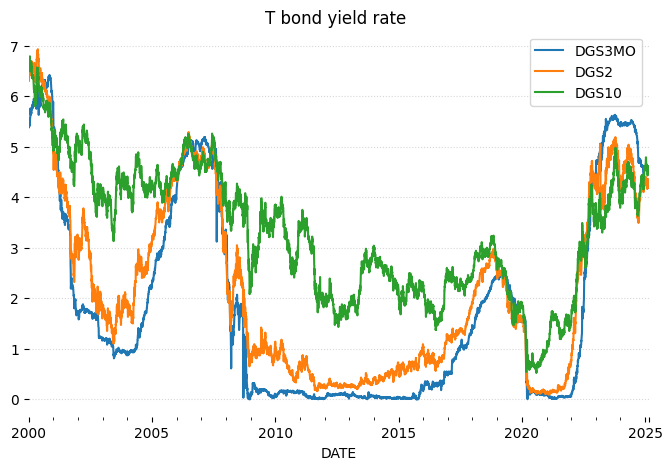

In [5]:
fig, ax = plt.subplots(figsize = (8, 5))
yield_rate.plot(ax = ax)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title(r'T bond yield rate ')
plt.show()

10년물의 수익률과 2년물의 수익률의 차이를 **장단기 스프레드**라고 하며, 이를 두고 경기가 불황인지 호황인지 추론을 할 수 있다.

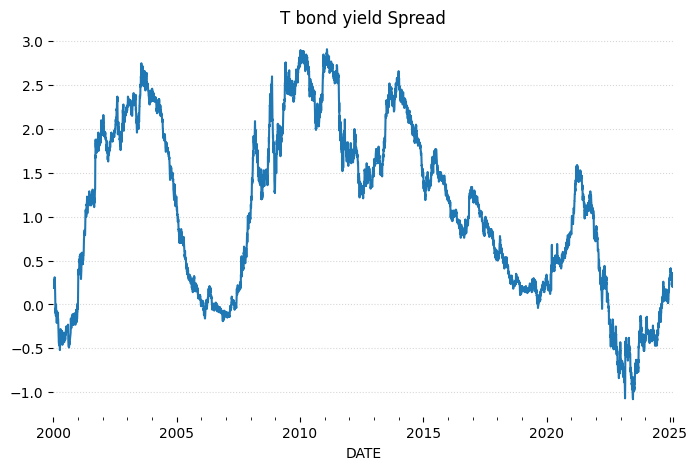

In [6]:
fig, ax = plt.subplots(figsize = (8, 5))
(yield_rate['DGS10'] - yield_rate['DGS2']).plot(ax = ax)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title(r'T bond yield Spread')
plt.show()

채권금리는 이미 차분된 데이터이기 때문에, 효과 추정을 위해서는 `pct_change()`가 아닌 `diff()`를 사용해 차분을 해줘야 한다.

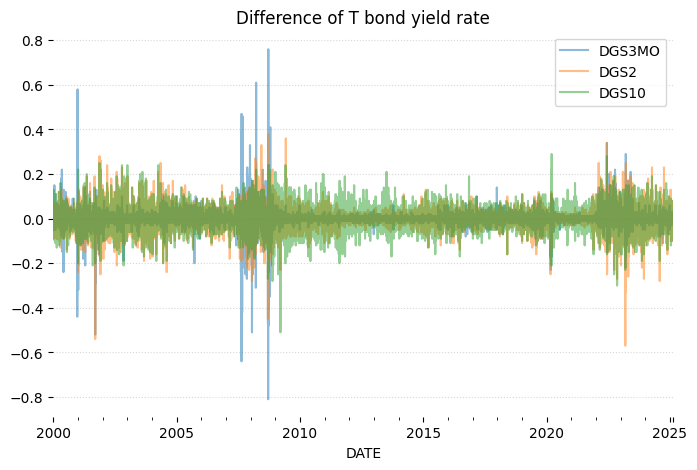

In [7]:
fig, ax = plt.subplots(figsize = (8, 5))
yield_rate.diff().plot(ax = ax, alpha = 0.5)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title(r'Difference of T bond yield rate')
plt.show()

### 2. Mortgage 30Y

모기지 30년물 금리는 미국 근로자들의 가처분소득과 관련있는 지표이다. 대부분의 미국 시민들은 주택 구입시 모기지를 통해 대출을 받아 구입하기 때문에, 모기지 금리가 상승하면 잠재 소비자들의 가처분소득이 하락하며 소비지표에 간접적으로 영향을 준다. 소비가 줄면 기업의 영업이익이 줄어들어 컨센서스가 전반적으로 악화되는 특성을 가진다.

In [8]:
mbs = pdr.get_data_fred(
    'MORTGAGE30US',
    start = '2000-01-01',
    end = '2025-02-22'
)

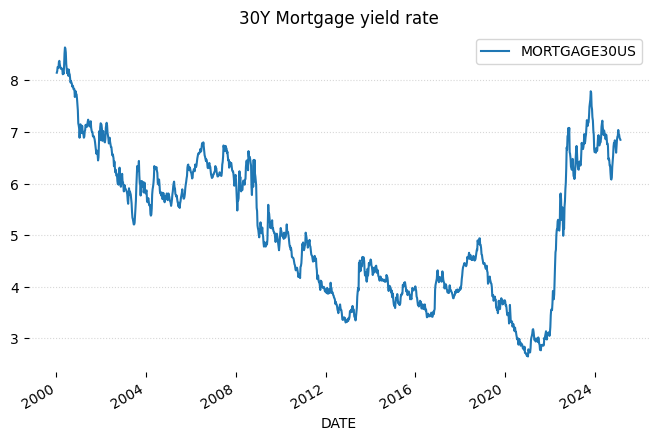

In [9]:
fig, ax = plt.subplots(figsize = (8, 5))
mbs.plot(ax = ax)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title(r'30Y Mortgage yield rate')
plt.show()

### 3. Gasoline Prices

전미 가솔린 평균가격은 생산자물가와 관련있는 지표이다. 가솔린가격이 상승하면 생산에 대한 제반비용이 상승하기 때문에 기업의 영업 전망에 악영향을 미친다.

In [10]:
gasoline = pdr.get_data_fred(
    'GASREGW',
    start = '2000-01-01',
    end = '2025-02-22'
)

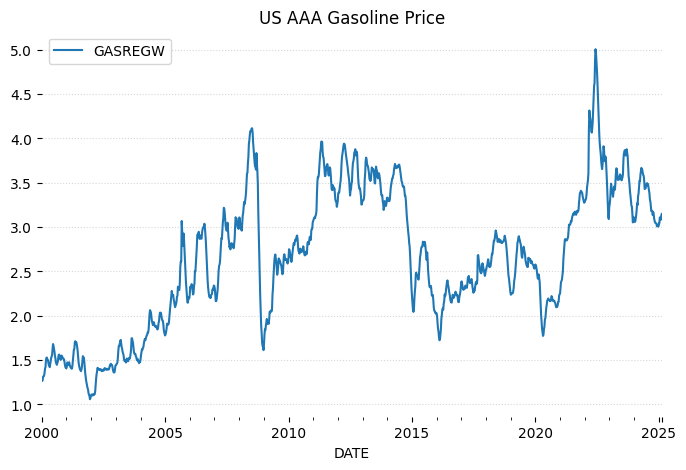

In [11]:
fig, ax = plt.subplots(figsize = (8, 5))
gasoline.plot(ax = ax)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title(r'US AAA Gasoline Price')
plt.show()

### 4. Consumer Price Index

소비자물가지수는 인플레이션 관련 지표이다. 인플레이션 압박이 심할 경우, FRED는 금리 인상에 대한 압박이 강해진다. 

금리 인상은 직접적으로는 기업의 가치평가에 있어서 Discount Rate을 키우고, 장기적으로는 기업의 비용을 증가시켜 기업의 이익을 감소시키기 때문에 주가 하락 압력으로 작용한다.

In [12]:
cpi = pdr.get_data_fred(
    'USACPIALLMINMEI',
    start = '2000-01-01',
    end = '2025-02-22'
)

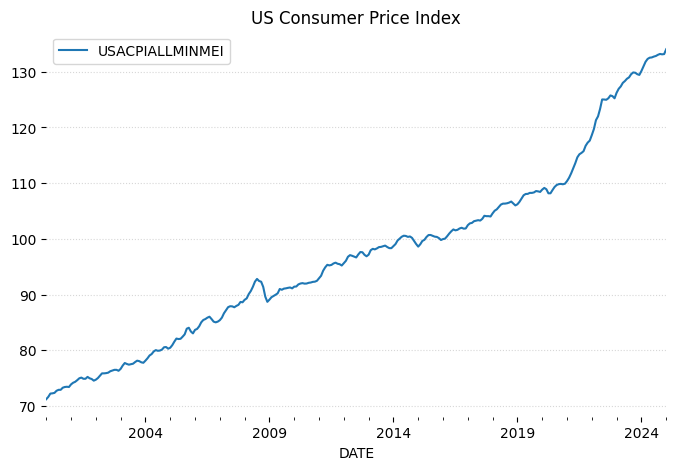

In [13]:
fig, ax = plt.subplots(figsize = (8, 5))
cpi.plot(ax = ax)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title(r'US Consumer Price Index')
plt.show()

CPI는 강한 시계열 메모리를 가지므로, 차분해서 사용해야 한다. 보통 연간 변동(12개월 차분)값을 많이 사용한다.

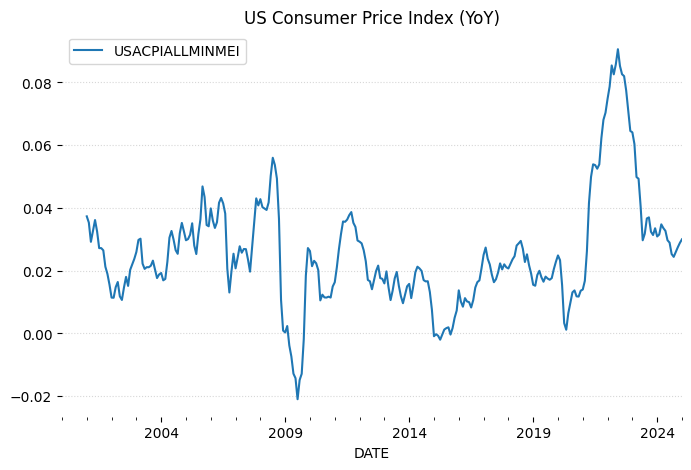

In [14]:
fig, ax = plt.subplots(figsize = (8, 5))
cpi.pct_change(12).plot(ax = ax)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title(r'US Consumer Price Index (YoY)')
plt.show()

### 5. Non farm Payroll

미국 고용의 90% 이상은 비농업부문, 즉 서비스업과 제조업에서 이뤄진다. 전체 70%는 서비스업인데, 비농업부문의 고용자수 변화는 소비에 즉각적으로 영향을 미친다.

즉, Non farm Payroll의 감소는 실업수당 청구건수(initial jobless claims)를 증가시키고, 실업률(unemployment rate)를 증가시킨다. 이는 소득의 감소로 이어지며, 결론적으로는 기업의 이익 컨센서스를 낮춘다.

In [15]:
nfp = pdr.get_data_fred(
    'NPPTTL',
    start = '2000-01-01',
    end = '2025-02-22'
)

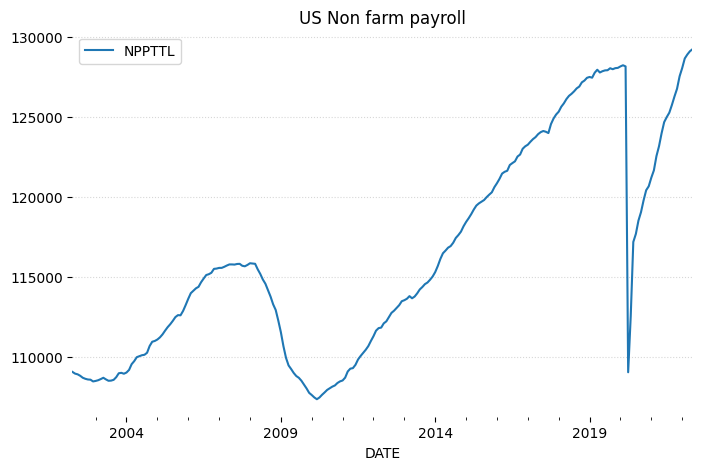

In [16]:
fig, ax = plt.subplots(figsize = (8, 5))
nfp.plot(ax = ax)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title(r'US Non farm payroll')
plt.show()

역시나 강한 시계열적 메모리를 가지기 때문에, 연간 변동(YoY)로 주로 보는 지표이다.

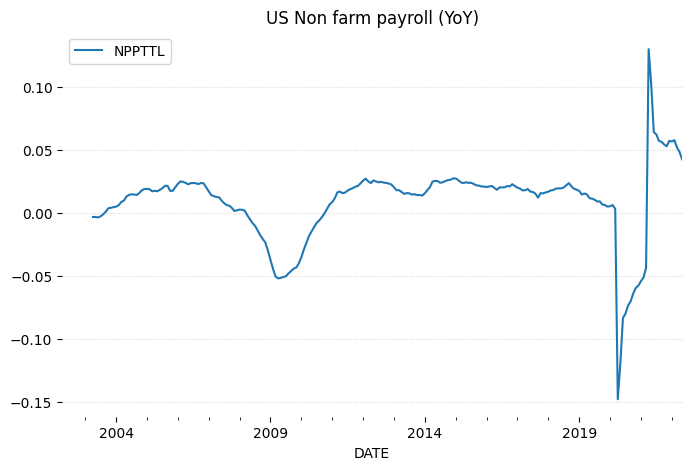

In [17]:
fig, ax = plt.subplots(figsize = (8, 5))
nfp.pct_change(12).plot(ax = ax)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title(r'US Non farm payroll (YoY)')
plt.show()